# Load Data

In [2]:
import pandas as pd
import numpy as np
import shutil
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD

In [3]:
# 불필요한 폴더 삭제
if os.path.exists("/content/drive/MyDrive/KDEF_All/Train/.ipynb_checkpoints"):
    shutil.rmtree("/content/drive/MyDrive/KDEF_All/Train/.ipynb_checkpoints")

if os.path.exists("/content/drive/MyDrive/KDEF_All/Test/.ipynb_checkpoints"):
    shutil.rmtree("/content/drive/MyDrive/KDEF_All/Test/.ipynb_checkpoints")

In [4]:
TRAIN_DIR = '/content/drive/MyDrive/KDEF_All/Train/'
TEST_DIR = '/content/drive/MyDrive/KDEF_All/Test/'
TEST_DIR_SIDE = '/content/drive/MyDrive/KDEF_SIDE/'

In [5]:
def load_dataset(directory):
    image_paths = []
    labels = []
    
    for label in os.listdir(directory):
        if label == '.DS_Store':
            continue
        for filename in os.listdir(directory+label):
            image_path = os.path.join(directory, label, filename)
            image_paths.append(image_path)
            labels.append(label)
            
        print(label, "Completed")
        
    return image_paths, labels

In [6]:
## convert into dataframe
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)
# shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
train.head()

happy Completed
sad Completed
afraid Completed
disgusted Completed
surprised Completed
neutral Completed
angry Completed


,image,label
0,/content/drive/MyDrive/KDEF_All/Train/neutral/...,neutral
1,/content/drive/MyDrive/KDEF_All/Train/disguste...,disgusted
2,/content/drive/MyDrive/KDEF_All/Train/disguste...,disgusted
3,/content/drive/MyDrive/KDEF_All/Train/afraid/B...,afraid
4,/content/drive/MyDrive/KDEF_All/Train/angry/BF...,angry


In [7]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR)
test.head()

happy Completed
angry Completed
neutral Completed
surprised Completed
sad Completed
afraid Completed
disgusted Completed


,image,label
0,/content/drive/MyDrive/KDEF_All/Test/happy/AF0...,happy
1,/content/drive/MyDrive/KDEF_All/Test/happy/AF0...,happy
2,/content/drive/MyDrive/KDEF_All/Test/happy/AF0...,happy
3,/content/drive/MyDrive/KDEF_All/Test/happy/AF0...,happy
4,/content/drive/MyDrive/KDEF_All/Test/happy/AF0...,happy


# Exploratory Data Analysis

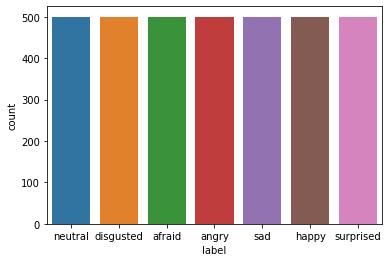

In [8]:
sns.countplot(train['label'])

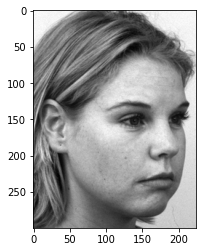

In [9]:
from PIL import Image

# center crop 적용 후, 224 x 300의 크기를 사용
img = Image.open(train['image'][0]).convert("L")
frac = 0.75
left = img.size[0]*((1-frac)/2)
upper = img.size[1]*((1-frac)/2)
right = img.size[0]-((1-frac)/2)*img.size[0]
bottom = img.size[1]-((1-frac)/2)*img.size[1]

cropped_img = img.crop((left, upper, right, bottom)).resize((224,300), Image.ANTIALIAS)
plt.imshow(cropped_img, cmap='gray');

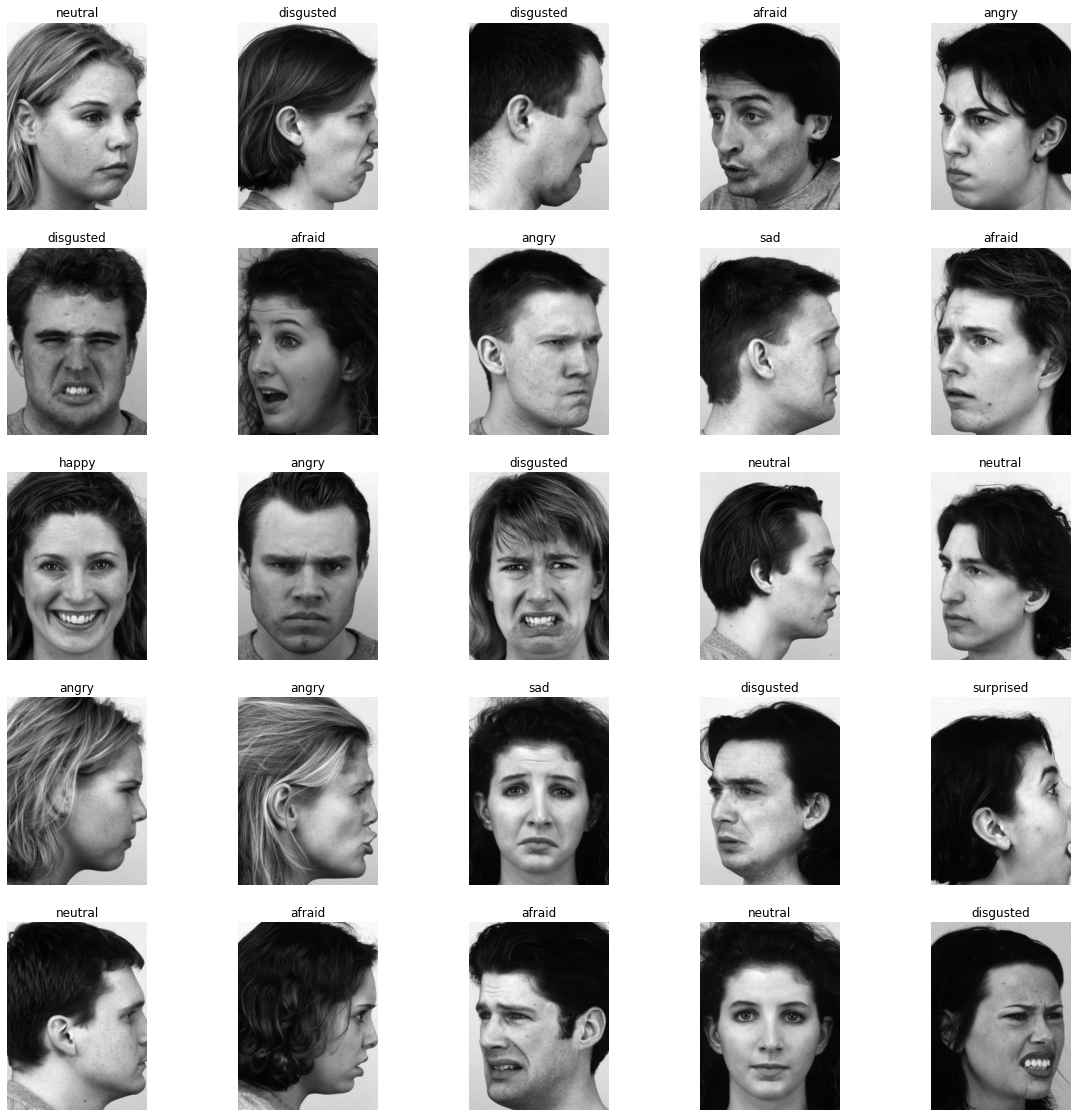

In [10]:
# to display grid of images
plt.figure(figsize=(20,20))
files = train.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file, grayscale=True)
    cropped_img = img.crop((left, upper, right, bottom)).resize((224,300), Image.ANTIALIAS)
    img = np.array(cropped_img)
    plt.imshow(cropped_img, cmap='gray')
    plt.title(label)
    plt.axis('off')

# Feature Extraction

In [11]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        cropped_img = img.crop((left, upper, right, bottom)).resize((224,300), Image.ANTIALIAS)
        img = np.array(cropped_img)
        features.append(img)

    features = np.array(features)
    features = features.reshape(len(features), 300, 224, 1)
    print(features.shape)
    return features

In [15]:
train_features = extract_features(train['image'])

  0%|          | 0/3500 [00:00<?, ?it/s]

(3500, 300, 224, 1)


In [12]:
test_features = extract_features(test['image'])

  0%|          | 0/1400 [00:00<?, ?it/s]

(1400, 300, 224, 1)


In [16]:
## normalize the image
x_train = train_features/255.0
x_test = test_features/255.0

In [17]:
## convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [18]:
# one-hot encoding
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [19]:
print(y_train[0])
print(y_test[0])

[0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0. 0. 0.]


# Data Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(
#         rotation_range=30,
#         width_shift_range=0.1,
#         height_shift_range=0.1,
#         shear_range=0.1,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         fill_mode='nearest')

In [ ]:
# train_generator = datagen.flow_from_directory(
#     TRAIN_DIR,
#     color_mode='grayscale',
#     target_size=(300,224),
#     batch_size=32,
#     class_mode='categorical',
#     shuffle=True)

Found 3500 images belonging to 7 classes.


In [ ]:
# 예시 출력
# plt.figure(figsize=(20,20))
# iterations = 1

# for index, (images, labels) in enumerate(train_generator):
#     for i in range(20):
#         img = np.array(images[i].reshape(300, 224))
#         plt.subplot(5, 5, i+1)
#         plt.imshow(img, cmap='gray')
#         plt.title(le.classes_[np.argmax(labels[i])])
#         plt.axis('off')
#     if index is iterations - 1:
#         break

# Model Creation

In [ ]:
# config
input_shape = (300, 224, 1)
output_class = 7

In [ ]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(output_class, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.00001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics='accuracy')

print(model.summary())

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_70 (Conv2D)          (None, 298, 222, 128)     1280      
                                                                 
 max_pooling2d_57 (MaxPoolin  (None, 149, 111, 128)    0         
 g2D)                                                            
                                                                 
 dropout_84 (Dropout)        (None, 149, 111, 128)     0         
                                                                 
 conv2d_71 (Conv2D)          (None, 147, 109, 256)     295168    
                                                                 
 max_pooling2d_58 (MaxPoolin  (None, 73, 54, 256)      0         
 g2D)                                                            
                                                                 
 dropout_85 (Dropout)        (None, 73, 54, 256)     

In [ ]:
# train the model
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=100, validation_data=(x_test, y_test))
# history = model.fit_generator(train_generator,
#        epochs=100,
#        validation_data=(x_test, y_test))

Epoch 1/100
110/110 [==============================] - 49s 442ms/step - loss: 1.9528 - accuracy: 0.1357 - val_loss: 1.9447 - val_accuracy: 0.1707
Epoch 2/100
110/110 [==============================] - 49s 444ms/step - loss: 1.9415 - accuracy: 0.1617 - val_loss: 1.9438 - val_accuracy: 0.1957
Epoch 3/100
110/110 [==============================] - 48s 441ms/step - loss: 1.9356 - accuracy: 0.1643 - val_loss: 1.9427 - val_accuracy: 0.2007
Epoch 4/100
110/110 [==============================] - 49s 443ms/step - loss: 1.9311 - accuracy: 0.1666 - val_loss: 1.9416 - val_accuracy: 0.2093
Epoch 5/100
110/110 [==============================] - 49s 442ms/step - loss: 1.9208 - accuracy: 0.1914 - val_loss: 1.9406 - val_accuracy: 0.2100
Epoch 6/100
110/110 [==============================] - 49s 443ms/step - loss: 1.9157 - accuracy: 0.1900 - val_loss: 1.9393 - val_accuracy: 0.2021
Epoch 7/100
110/110 [==============================] - 49s 442ms/step - loss: 1.9132 - accuracy: 0.1971 - val_loss: 1.9389 -

# Plot the Results

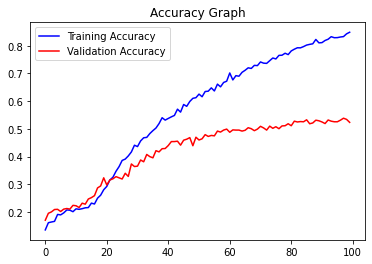

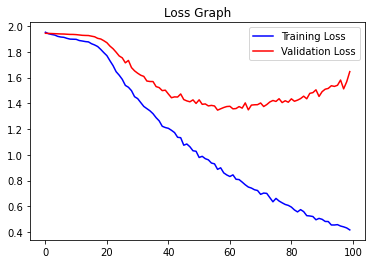

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()

# Save Model

In [ ]:
model.save('fer_all.h5')

# Test with Image Data

Original Output: surprised
1/1 [==============================] - 0s 18ms/step
Predicted Output: surprised


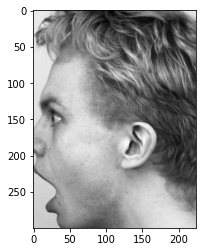

In [ ]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 300, 224, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(300, 224), cmap='gray');

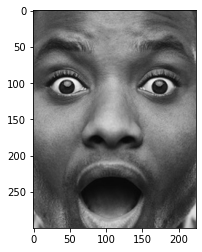

In [ ]:
from PIL import Image

# center crop 적용 후, 224 x 300의 크기를 사용
img = Image.open("face_surprised.jpeg").convert("L")
frac = 0.5
left = img.size[0]*((1-frac)/2)
upper = img.size[1]*((1-frac)/2)
right = img.size[0]-((1-frac)/2)*img.size[0]
bottom = img.size[1]-((1-frac)/2)*img.size[1]

cropped_img = img.crop((left, upper, right, bottom)).resize((224,300), Image.ANTIALIAS)
img = np.array(cropped_img)
plt.imshow(img, cmap='gray');

In [ ]:
pred = loaded_model.predict(img.reshape(1, 300, 224, 1))
print(le.classes_)
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)

1/1 [==============================] - 0s 26ms/step
['afraid' 'angry' 'disgusted' 'happy' 'neutral' 'sad' 'surprised']
Predicted Output: afraid


# Load Model

In [20]:
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/fer_all.h5')

# Visualize Model

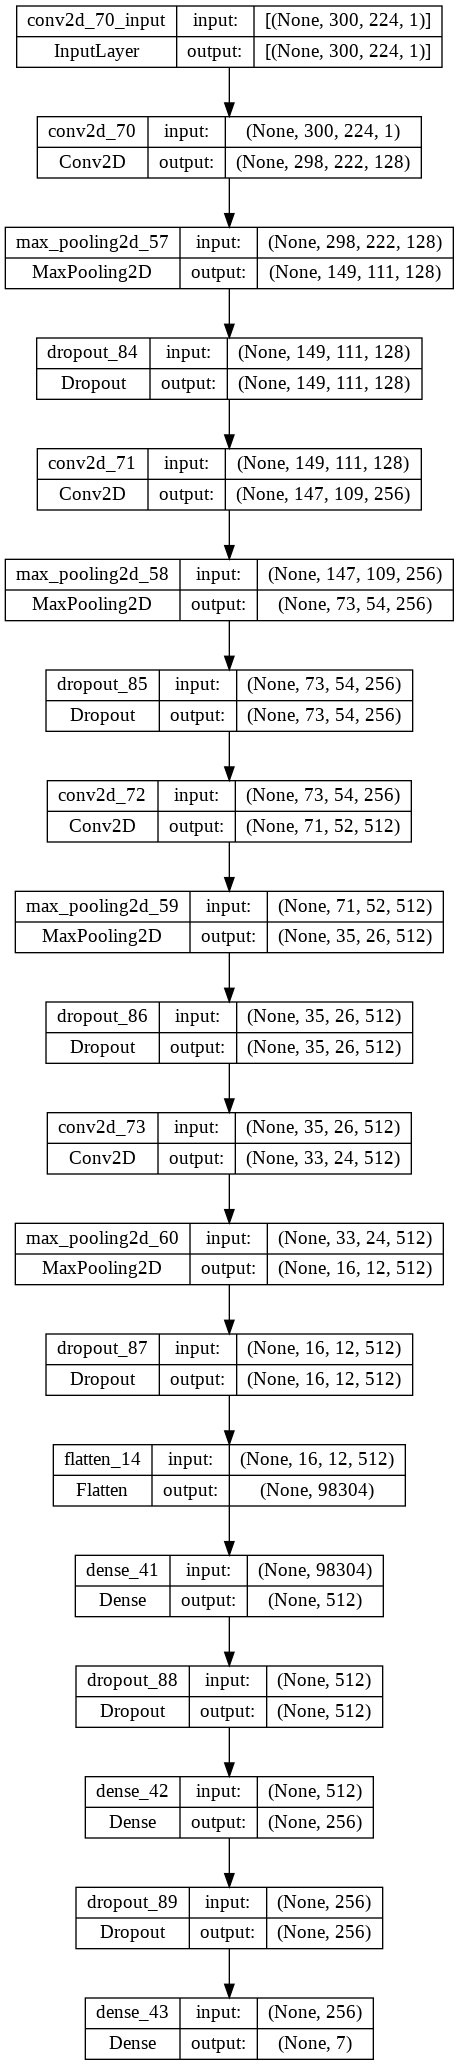

In [21]:
from keras.utils.vis_utils import plot_model
plot_model(loaded_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 992 kB 38.9 MB/s 


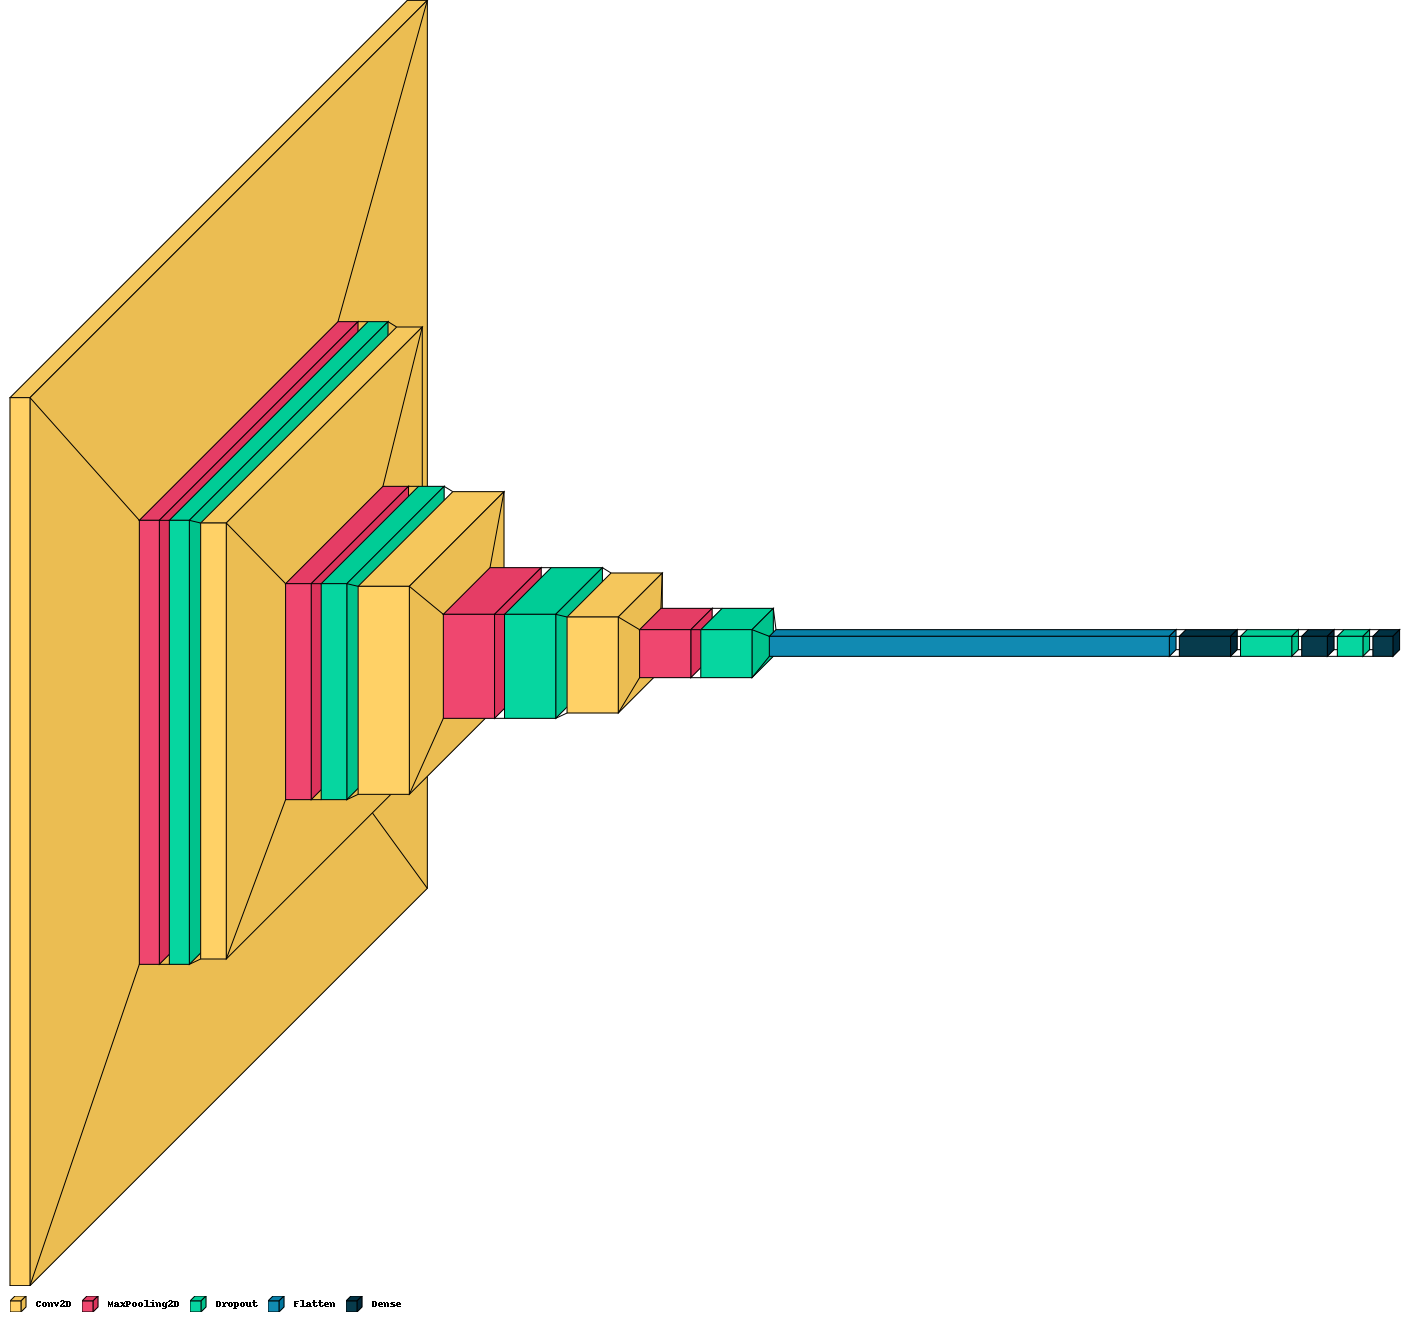

In [ ]:
import visualkeras
from PIL import ImageFont

visualkeras.layered_view(loaded_model, legend=True)

# Evaluate Model

In [22]:
score = loaded_model.evaluate(x_test, y_test, verbose = 1)

44/44 [==============================] - 16s 163ms/step - loss: 1.6468 - accuracy: 0.5236


In [23]:
print(f'Accuracy : {score[1]} Loss: {score[0]}')

Accuracy : 0.5235714316368103 Loss: 1.6467843055725098


# Evaluate Model with Side Image

In [ ]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR_SIDE)
test.head()

neutral Completed
surprised Completed
disgusted Completed
sad Completed
angry Completed
happy Completed
afraid Completed


,image,label
0,/content/drive/MyDrive/KDEF_SIDE/neutral/AF01N...,neutral
1,/content/drive/MyDrive/KDEF_SIDE/neutral/AF02N...,neutral
2,/content/drive/MyDrive/KDEF_SIDE/neutral/AF02N...,neutral
3,/content/drive/MyDrive/KDEF_SIDE/neutral/AF01N...,neutral
4,/content/drive/MyDrive/KDEF_SIDE/neutral/AF01N...,neutral


In [ ]:
test_features = extract_features(test['image'])
x_test = test_features/255.0

  0%|          | 0/1120 [00:00<?, ?it/s]

(1120, 300, 224, 1)


In [ ]:
## convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(test['label'])
y_test = le.transform(test['label'])
y_test = to_categorical(y_test, num_classes=7)

In [ ]:
score = loaded_model.evaluate(x_test, y_test, verbose = 1)

35/35 [==============================] - 14s 131ms/step - loss: 1.6700 - accuracy: 0.5045
